<h1 style="text-align:center;font-weight:bold;color: #FFFFFF;background: #FFFFFF;
text-shadow: 1px 3px 0 #969696, 1px 13px 5px #aba8a8;background:linear-gradient(to bottom, rgba(40, 40, 40, 0.05), rgba(40, 40, 40, 0.1));box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);padding:10px;">Airbnb data analysis (Exploratory)</h1>

Visualizing...

Price column Statistics: 
Mean Price: 222.19388681529304
Median Price: 125
Mode Price: 100
Standard Deviation of Price: 290.7870951753094

First 20 rows of the Airbnb data


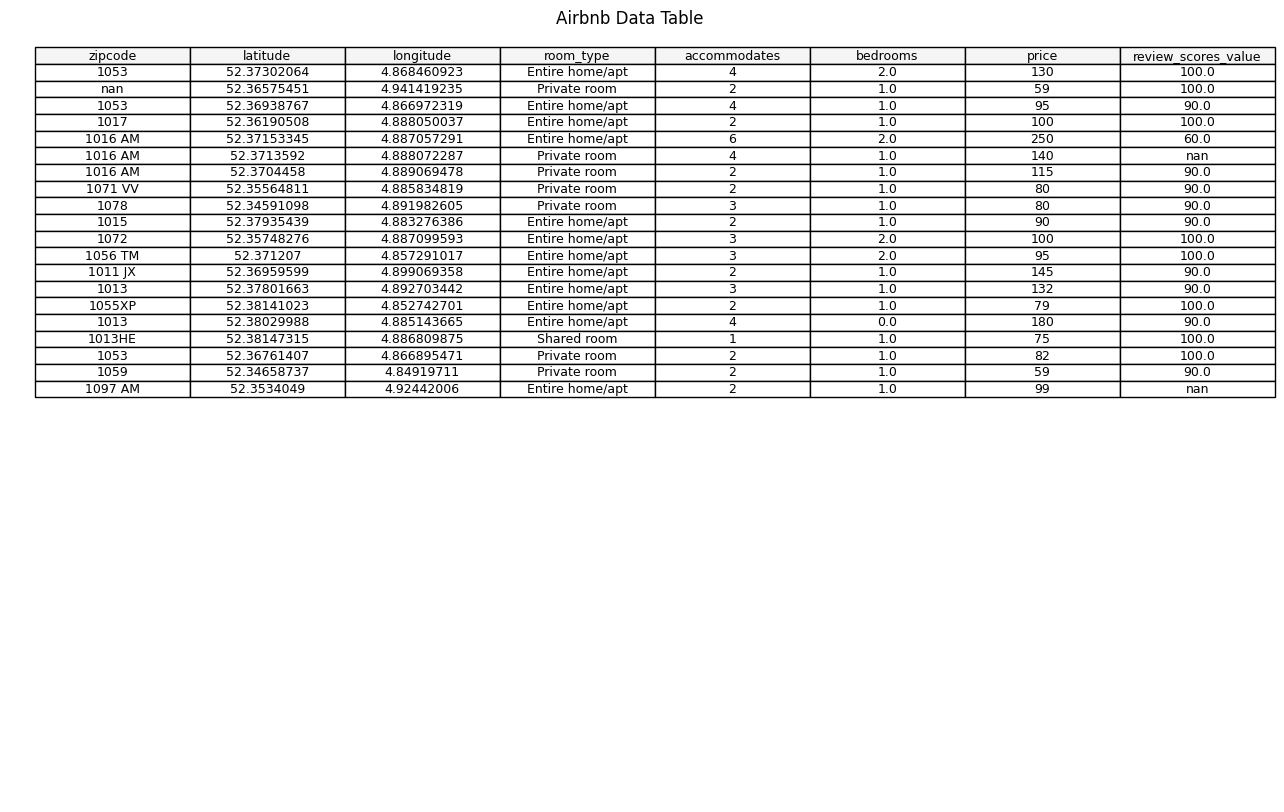

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import statistics


def visualize_airbnb_data(showVisuals: bool = False) -> None:
    """
    Visualizes data from airbnb.csv file and optionally displays plots in the UI.
    
    Arguments:
    - showVisuals (bool): Flag controls visualization display. Default is False.
    """

    print("Visualizing...")

    cwd = Path.cwd()
    root_path = cwd.parent

    images_dir = root_path / 'scratch' / 'v_images'
    if not images_dir.exists():
        print(f"Creating directory: {images_dir}")
        images_dir.mkdir(parents=True, exist_ok=True)

    file_path = root_path / 'data' / 'airbnb.csv'

    if not file_path.exists():
        print(f"Error: File '{file_path}' does not exist.")
        return

    # Load CSV data into a DataFrame
    try:
        df = pd.read_csv(file_path)

        # Data cleaning
        df['price'] = pd.to_numeric(df['price'].astype(str).str.extract(r'(\d+)')[0], errors='coerce')

        # Remove rows where 'price' is NaN after cleaning
        df = df.dropna(subset=['price'])

        # Basic statistics for 'price'
        price_mean = statistics.mean(df['price'])
        price_median = statistics.median(df['price'])
        price_mode = statistics.mode(df['price'])
        price_std = statistics.stdev(df['price'])

        # Displaying statistics with visualizations
        print("\nPrice column Statistics: ")
        print(f"Mean Price: {price_mean}")
        print(f"Median Price: {price_median}")
        print(f"Mode Price: {price_mode}")
        print(f"Standard Deviation of Price: {price_std}")

        # Visualizing statistics
        plt.figure(figsize=(14, 6))

        # Mean Price
        plt.subplot(1, 4, 1)
        plt.bar('Mean', price_mean, color='blue')
        plt.title('Mean Price')
        plt.ylabel('Price')
        
        # Median Price
        plt.subplot(1, 4, 2)
        plt.bar('Median', price_median, color='green')
        plt.title('Median Price')
        
        # Mode Price
        plt.subplot(1, 4, 3)
        plt.bar('Mode', price_mode, color='red')
        plt.title('Mode Price')
        
        # Standard Deviation
        plt.subplot(1, 4, 4)
        plt.bar('Std Dev', price_std, color='purple')
        plt.title('Standard Deviation of Price')

        plt.tight_layout()
        plt.savefig(images_dir / 'airbnb_price_statistics.png', bbox_inches='tight')

        if showVisuals:
            plt.show()
        else:
            plt.close()

        #=============== TABLE ==============
        #=====================================
        print("\nFirst 20 rows of the Airbnb data")

        # Creating a table
        plt.figure(figsize=(16, 10))  # Adjusting height to 10 and width to 16
        plt.axis('off')  # Hide the axis
        
        table = plt.table(cellText=df.head(20).values,
                          colLabels=df.columns,
                          cellLoc='center',
                          loc='upper left',
                          colColours=['#f5f5f5'] * len(df.columns),
                          fontsize=14)
        
        plt.title('Airbnb Data Table')
        plt.savefig(images_dir / 'airbnb_data_rows_table.png', bbox_inches='tight')

        plt.show()
        plt.close()
        #=====================================
        # =============== TABLE ==============

        # Pie chart for distribution of room types
        plt.figure(figsize=(8, 6))
        pie_plot = df['room_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
        plt.title('Distribution of Room Types')
        plt.ylabel('')
        plt.legend(title="Room Type", loc="upper left", bbox_to_anchor=(1, 0.5), labels=df['room_type'].value_counts().index.tolist())
        plt.savefig(images_dir / 'airbnb_room_type_distribution.png', bbox_inches='tight')

        if showVisuals:
            plt.show()
        else:
            plt.close()

        # Average price per room type
        avg_price = df.groupby('room_type')['price'].mean().sort_values(ascending=False)

        plt.figure(figsize=(10, 6))
        bar_plot = avg_price.plot(kind='bar')
        plt.title('Average Price per Room Type')
        plt.ylabel('Average Price')
        plt.xlabel('Room Type')
        plt.legend(title="Room Type", loc="upper right")
        plt.savefig(images_dir / 'airbnb_average_price_per_room_type.png')

        if showVisuals:
            plt.show()
        else:
            plt.close()

        # Scatter plot for latitude vs longitude
        plt.figure(figsize=(10, 6))
        scatter = plt.scatter(df['longitude'], df['latitude'], c=df['price'], cmap='coolwarm', alpha=0.7)
        plt.colorbar(label='Price')
        plt.title('Latitude vs Longitude with Price')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.legend(*scatter.legend_elements(), title="Price", loc="upper right")
        plt.savefig(images_dir / 'airbnb_latitude_longitude_price_scatter.png')
        
        if showVisuals:
            plt.show()
        else:
            plt.close()

    except Exception as e:
        print(f"An error occurred: {e}")

visualize_airbnb_data(showVisuals=False)


<h2 style="text-align:center;font-weight:bold;color: #FFFFFF;background: #FFFFFF;
text-shadow: 1px 3px 0 #969696, 1px 13px 5px #aba8a8;background:linear-gradient(to bottom, rgba(40, 40, 40, 0.05), rgba(40, 40, 40, 0.1));box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);padding:10px;">Room Types Distribution</h2>

![Distribution of Room Types](v_images/airbnb_room_type_distribution.png)

<p style="font-family:italic"><strong><blockquote style="font-style:italic; font-weight:bold;">  The pie chart visualizes the distribution of different room types in the Airbnb listings dataset. Each slice represents a room type, and the size of the slice corresponds to the percentage of that room type in the dataset. This visualization helps to understand the variety and prevalence of different room types.</blockquote> </strong></p> 

<h2 style="text-align:center;font-weight:bold;color: #FFFFFF;background: #FFFFFF;
text-shadow: 1px 3px 0 #969696, 1px 13px 5px #aba8a8;background:linear-gradient(to bottom, rgba(40, 40, 40, 0.05), rgba(40, 40, 40, 0.1));box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);padding:10px;">Average Price per Room Type</h2>

![Average Price per Room Type](v_images/airbnb_average_price_per_room_type.png)

<p style="font-family:italic"><strong><blockquote style="font-style:italic; font-weight:bold;"> This bar chart shows the average price of each room type in the Airbnb listings dataset. It provides insights into the relative pricing of different room types. Higher bars indicate higher average prices for those room types.</blockquote> </strong></p> 

<h2 style="text-align:center;font-weight:bold;color: #FFFFFF;background: #FFFFFF;
text-shadow: 1px 3px 0 #969696, 1px 13px 5px #aba8a8;background:linear-gradient(to bottom, rgba(40, 40, 40, 0.05), rgba(40, 40, 40, 0.1));box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);padding:10px;">Latitude vs Longitude with Price</h2>

![Latitude vs Longitude with Price](v_images/airbnb_latitude_longitude_price_scatter.png)

<p style="font-family:italic"><strong><blockquote style="font-style:italic; font-weight:bold;">The scatter plot displays the latitude and longitude of Airbnb listings with the price represented by color intensity. This visualization helps to identify areas with higher and lower priced listings.</blockquote> </strong></p> 



<h2 style="text-align:center;font-weight:bold;color: #FFFFFF;background: #FFFFFF;
text-shadow: 1px 3px 0 #969696, 1px 13px 5px #aba8a8;background:linear-gradient(to bottom, rgba(40, 40, 40, 0.05), rgba(40, 40, 40, 0.1));box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);padding:10px;">Technical Overview</h2>

<h4 style="font-family:italic"><strong>The dataset comprises Airbnb listings, featuring attributes such as latitude, longitude, room type, accommodates, bedrooms, price, and review scores.</strong> </h4>

### Data Insights:

1. **Data Completeness:** 
   - Several columns, including 'price', 'latitude', 'longitude', and 'review_scores_value', contain missing values that need attention.

2. **Data Cleaning:**
   - 'price' has mixed data types and requires conversion to a consistent numeric format.
   - Latitude and longitude should be scrutinized for outliers or erroneous entries.
  
3. **Duplicate Columns:**
   - No redundant columns were found in this dataset.

### Actionable Recommendations:

1. **Data Cleaning:** 
   - Standardize 'price' and address missing values through imputation or removal after thorough analysis.
  
2. **Feature Engineering:** 
   - Introduce new metrics like 'rent per area' or 'price per accommodates' to offer deeper insights into pricing dynamics and property valuations.
  
3. **Data Enrichment:** 
   - Augment the dataset by integrating external data sources, such as neighborhood demographics or property amenities, to enrich the analytical depth.
  
4. **Data Visualization:** 
   - Leverage visualizations to dissect relationships across variables like room type vs. price and geographic coordinates, uncovering trends and patterns within the Airbnb listings.


 
---

<h2 style="text-align:center;font-weight:bold;color: #FFFFFF;background: #FFFFFF;
text-shadow: 1px 3px 0 #969696, 1px 13px 5px #aba8a8;background:linear-gradient(to bottom, rgba(40, 40, 40, 0.05), rgba(40, 40, 40, 0.1));box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);padding:10px;">Business Overview</h2>

The Airbnb dataset offers valuable insights into the rental property market, focusing on price trends across different property types. Understanding these statistics can provide significant advantages for potential investors looking to make informed decisions in the rental property market.

<h3 style="text-decoration:underline">Mean Price</h3>

The mean price of properties listed on Airbnb is approximately **$222.19**. This provides a general idea of the average cost of rental properties available on the platform. However, individual listings may vary significantly from this average.

The median price stands at **$125**, indicating that half of the listings are priced below this value. The median offers a balanced view of the price distribution and is less affected by extreme values.

<h3 style="text-decoration:underline">Mode Price</h3>

The mode price is **$100**, suggesting that this price point is the most common among the listings. This could be an attractive price point for budget-conscious travelers and indicates a high demand for listings at this price.

<h3 style="text-decoration:underline">Standard Deviation</h3>

The standard deviation of **$290.79** reveals the variability or spread of prices around the mean. A higher standard deviation implies that prices vary widely, indicating a diverse range of properties with different amenities, locations, and sizes.

<h3 style="text-decoration:underline">Investment Implications</h3>

- **Diversification Opportunities**: The wide range of prices suggests investors can diversify their portfolio by investing in properties across different price points.
  
- **Budget-Friendly Options**: The mode price of $100 indicates a potential market for budget-friendly accommodations, attracting a larger customer base.
  
- **Market Research**: Understanding the mean, median, and mode prices helps investors identify market trends, forecast demand, and set competitive pricing for their listings.
  
- **Risk Assessment**: The standard deviation provides insights into the market's volatility, helping investors assess the risk associated with their investments.

<h3 style="text-decoration:underline">Conclusion</h3>
<p style="font-family:italic"><strong><blockquote style="font-style:italic; font-weight:bold;">The statistics derived from the Airbnb dataset offer a comprehensive view of the rental property market. By analyzing these metrics, investors can gain valuable insights into pricing trends, market demand, and investment opportunities. Whether you're looking to diversify your portfolio, target budget-friendly options, or conduct market research, these statistics serve as a valuable tool to guide your investment decisions.</blockquote> </strong></p> 